In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import bisect
from scipy.optimize import newton
from scipy.optimize import fixed_point
import matplotlib.pyplot as plt
import time
import sympy as sp

# 1.

a. Los pasos para aplicar el método de la bisección son los siguientes:

1. Seleccionar un intervalo [a, b] que contenga la raíz de la función f(x).
2. Calcular el punto medio c = (a + b) / 2.
3. Evaluar la función en el punto medio f(c).
4. Si f(c) es igual a cero, entonces c es la raíz de la función. Si no, entonces se selecciona el subintervalo [a, c] o [c, b] que tiene signos opuestos en los extremos y se repiten los pasos 2-4 hasta que se alcance la precisión deseada.

b. La deducción del método de Newton-Raphson se realiza de la siguiente manera:

Dada una función f(x), se busca la raíz de la función, es decir, el valor de x tal que f(x) = 0. Para ello, se utiliza la fórmula de la recta tangente a la curva de f(x) en el punto x_n:

$$y = f(x_n) + f'(x_n)(x - x_n)$$

Donde f'(x_n) es la derivada de f(x) evaluada en x_n. Luego, se busca el valor de x que hace que y sea igual a cero, es decir, la intersección de la recta tangente con el eje x. Esto se logra despejando x de la ecuación anterior:


$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$


Este proceso se repite hasta que se alcance la precisión deseada.

c. La principal diferencia entre el método de Newton-Raphson y el método de la secante es que el primero requiere el cálculo de la derivada de la función, mientras que el segundo no. En lugar de la derivada, el método de la secante utiliza una aproximación de la misma basada en dos puntos de la curva de la función. Además, el método de Newton-Raphson converge más rápidamente que el método de la secante, pero puede ser más sensible a la elección del punto inicial.

d. Los pasos para aplicar el método del punto fijo son los siguientes:

1. Se reescribe la ecuación f(x) = 0 en la forma x = g(x).
2. Se selecciona una aproximación inicial x_0.
3. Se aplica la fórmula iterativa $$x_{n+1} = g(x_n)$$ hasta que se alcance la precisión deseada.


# 2.

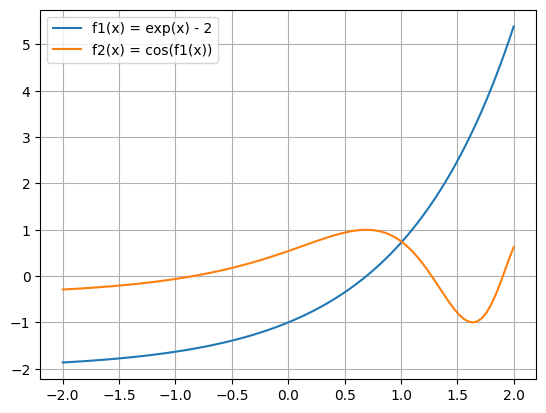

In [4]:
f1 = lambda x: np.exp(x) - 2
f2 = lambda x: np.cos(f1(x))
f = lambda x: f1(x) - f2(x)
x = np.linspace(-2,2,100)
plt.plot(x,f1(x), label = "f1(x) = exp(x) - 2")
plt.plot(x, f2(x), label = "f2(x) = cos(f1(x))")
plt.legend()
plt.grid(True)
plt.show()

## Secante

In [5]:
# Valor inicial para el método de Newton
initial_guess = 1

# Registra el tiempo de inicio
inicio = time.time()

# Iteración del método de Newton 1000 veces
for _ in range(1000):
  result = newton(f, initial_guess)

# Registra el tiempo de finalización
fin = time.time()

# Calcula el tiempo transcurrido en segundos
tiempo = fin - inicio

# Imprime la raíz encontrada y el tiempo de ejecución para 1000 repeticiones
print("La raíz encontrada es:", result, "y su tiempo de ejecución para 1000 repeticiones es:", tiempo, "s")

La raíz encontrada es: 1.0076239716581368 y su tiempo de ejecución para 1000 repeticiones es: 0.31845688819885254 s


### Newton - Raphson

In [6]:
# Definición de la derivada de la función f
df = lambda x: np.exp(x) + np.sin(f1(x)) * np.exp(x)

# Valor inicial para el método de Newton
initial_guess = 1

# Registra el tiempo de inicio
inicio = time.time()

# Iteración del método de Newton 1000 veces, utilizando la derivada df
for _ in range(1000):
  result = newton(f, initial_guess, df)

# Registra el tiempo de finalización
fin = time.time()

# Calcula el tiempo transcurrido en segundos
tiempo = fin - inicio

# Imprime la raíz encontrada y el tiempo de ejecución para 1000 repeticiones
print("La raíz encontrada es:", result, "y su tiempo de ejecución para 1000 repeticiones es:", tiempo, "s")

La raíz encontrada es: 1.0076239716581368 y su tiempo de ejecución para 1000 repeticiones es: 0.3274502754211426 s


### Bisección

In [7]:
# Definición de los límites a y b para el método de bisección
a = 0
b = 2

# Registra el tiempo de inicio
inicio = time.time()

# Iteración del método de bisección 1000 veces
for _ in range(1000):
  raiz = bisect(f, a, b)

# Registra el tiempo de finalización
fin = time.time()

# Calcula el tiempo transcurrido en segundos
tiempo = fin - inicio

# Imprime la raíz encontrada y el tiempo de ejecución para 1000 repeticiones
print("La raíz encontrada es:", raiz, "y su tiempo de ejecución para 1000 repeticiones es:", tiempo, "s")

La raíz encontrada es: 1.0076239716563578 y su tiempo de ejecución para 1000 repeticiones es: 0.4358203411102295 s


### Punto Fijo

In [8]:
# Valor inicial para el método de punto fijo
x0 = 1.25

# Definición de la función g(x) para el método de punto fijo
g = lambda x: x - f(x)

# Registra el tiempo de inicio
inicio = time.time()

# Iteración del método de punto fijo 1000 veces
for _ in range(1000):
  raiz_aproximada = fixed_point(g, x0)

# Registra el tiempo de finalización
fin = time.time()

# Calcula el tiempo transcurrido en segundos
tiempo = fin - inicio

# Imprime la raíz aproximada y el tiempo de ejecución para 1000 repeticiones
print("La raíz aproximada es:", raiz_aproximada, "y su tiempo de ejecución para 1000 repeticiones es:", tiempo, "s")

La raíz aproximada es: 1.0076239716581366 y su tiempo de ejecución para 1000 repeticiones es: 3.2381458282470703 s


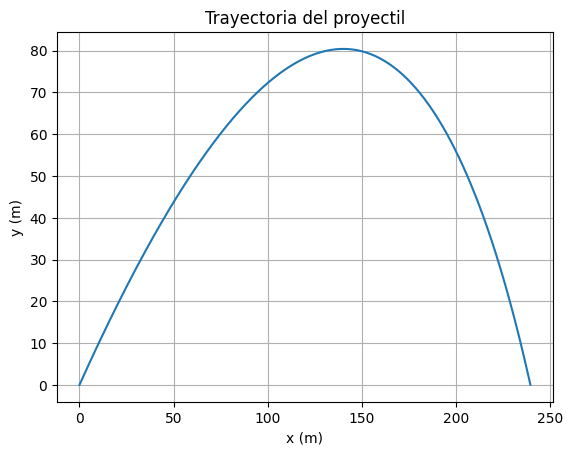

In [9]:
# Definición de variables conocidas
alpha = np.pi  # Ángulo en radianes
v0 = 60
u = v0/2
theta0 = np.deg2rad(45)  # Ángulo en radianes
b = 0.05
g = 9.8

# Definición de las funciones x(t) y y(t) como funciones lambda
x_t = lambda t: (u * np.cos(alpha)) * t + (1 / b) * ((v0) * np.cos(theta0) - u * np.cos(alpha)) * (1 - np.exp(-b * t))

y_t = lambda t: (1 / b) * ((g / b) + (v0) * np.sin(theta0) - u * np.sin(alpha)) * (1 - np.exp(-b * t)) - ((g / b) - u * np.sin(alpha)) * t

# Valor inicial para encontrar el tiempo de vuelo máximo utilizando el método de Newton
initial_guess = 8
t_max = newton(y_t, initial_guess)

# Creación de un arreglo de tiempo desde 0 hasta t_max con pasos de 0.01
t = np.arange(0, t_max, 0.01)

# Graficación de la trayectoria
plt.plot(x_t(t), y_t(t))
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Trayectoria del proyectil")
plt.grid(True)

In [10]:
# Creación de un diccionario llamado "dicc" para almacenar datos
dicc = {"X": [], "Y": [], "T": []}

# Llenado del diccionario con datos calculados
# Utilizamos np.linspace para generar 1000 puntos igualmente espaciados en el intervalo [0, t_max]

# Llenando la lista "X" en el diccionario con valores de x_t en el intervalo [0, t_max]
dicc["X"] = x_t(np.linspace(0, t_max, 1000))

# Llenando la lista "Y" en el diccionario con valores de y_t en el intervalo [0, t_max]
dicc["Y"] = y_t(np.linspace(0, t_max, 1000))

# Llenando la lista "T" en el diccionario con valores de tiempo en el intervalo [0, t_max]
dicc["T"] = np.linspace(0, t_max, 1000)

In [11]:
df = pd.DataFrame(dicc)
df

,X,Y,T
0,0.000000,0.000000,0.000000
1,0.344372,0.344099,0.008120
2,0.688506,0.687412,0.016239
3,1.032401,1.029940,0.024359
4,1.376058,1.371682,0.032479
...,...,...,...
995,239.011203,1.199722,8.079148
996,239.160179,0.900578,8.087268
997,239.308995,0.600910,8.095388
998,239.457652,0.300717,8.103507


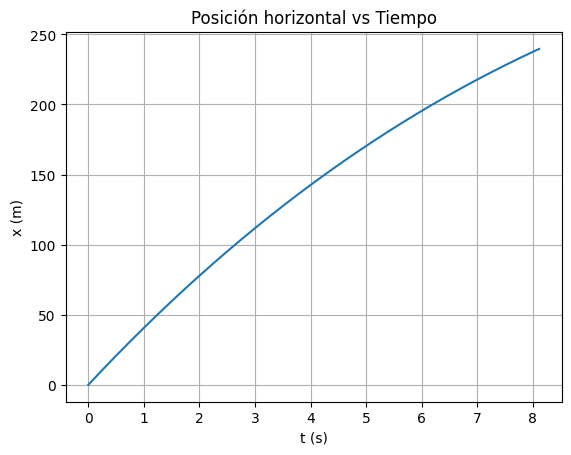

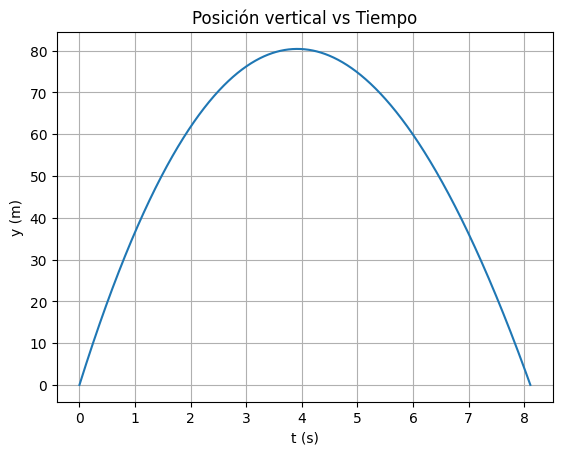

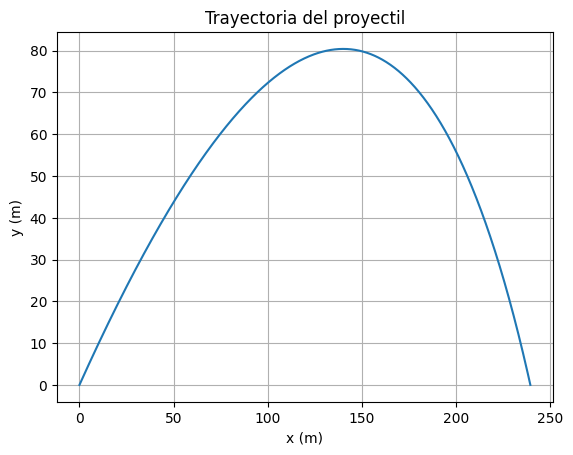

In [12]:
# Creación de un gráfico de Posición horizontal vs Tiempo
plt.figure()
plt.plot(df["T"], df["X"])
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.title("Posición horizontal vs Tiempo")
plt.grid(True)

# Creación de un gráfico de Posición vertical vs Tiempo
plt.figure()
plt.plot(df["T"], df["Y"])
plt.xlabel("t (s)")
plt.ylabel("y (m)")
plt.title("Posición vertical vs Tiempo")
plt.grid(True)

# Creación de un gráfico de la Trayectoria del proyectil
plt.figure()
plt.plot(df["X"], df["Y"])
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Trayectoria del proyectil")
plt.grid(True)

In [13]:
# Valor inicial para encontrar el tiempo de vuelo máximo utilizando el método de Newton
initial_guess = 8
t_max = newton(y_t, initial_guess)

# Imprime la distancia horizontal máxima calculada utilizando el tiempo de vuelo máximo
print("La distancia horizontal máxima para un ángulo de 45° grados es:", x_t(t_max), "m")

La distancia horizontal máxima para un ángulo de 45° grados es: 239.6061494552073 m


In [14]:
# Esta función calcula y grafica la trayectoria de un tiro parabólico con un ángulo dado.

def tiro_parabolico(theta):
  # Definición de constantes y parámetros del tiro parabólico
  alpha = np.pi  # Ángulo en radianes
  v0 = 60  # Velocidad inicial en m/s
  u = v0/2  # Velocidad horizontal constante en m/s
  theta0 = np.deg2rad(theta)  # Ángulo inicial en radianes
  b = 0.05  # Coeficiente de resistencia del aire
  g = 9.8  # Aceleración debido a la gravedad en m/s^2

  # Definición de las funciones x(t) y y(t) como funciones lambda
  x_t = lambda t: (u * np.cos(alpha)) * t + (1 / b) * ((v0) * np.cos(theta0) - u * np.cos(alpha)) * (1 - np.exp(-b * t))
  y_t = lambda t: (1 / b) * ((g / b) + (v0) * np.sin(theta0) - u * np.sin(alpha)) * (1 - np.exp(-b * t)) - ((g / b) - u * np.sin(alpha)) * t

  # Valor inicial para encontrar el tiempo de vuelo máximo utilizando el método de Newton
  initial_guess = 8
  t_max = newton(y_t, initial_guess)

  # Creación de un arreglo de tiempo desde 0 hasta t_max con pasos de 0.01
  t = np.arange(0, t_max, 0.01)

  # Graficación de la trayectoria
  plt.plot(x_t(t), y_t(t), label=f"Ángulo de {theta}°")
  plt.grid(True)
  plt.xlabel("x (m)")
  plt.ylabel("y (m)")
  plt.title("Tiro Parabólico para distintos ángulos")
  plt.legend()

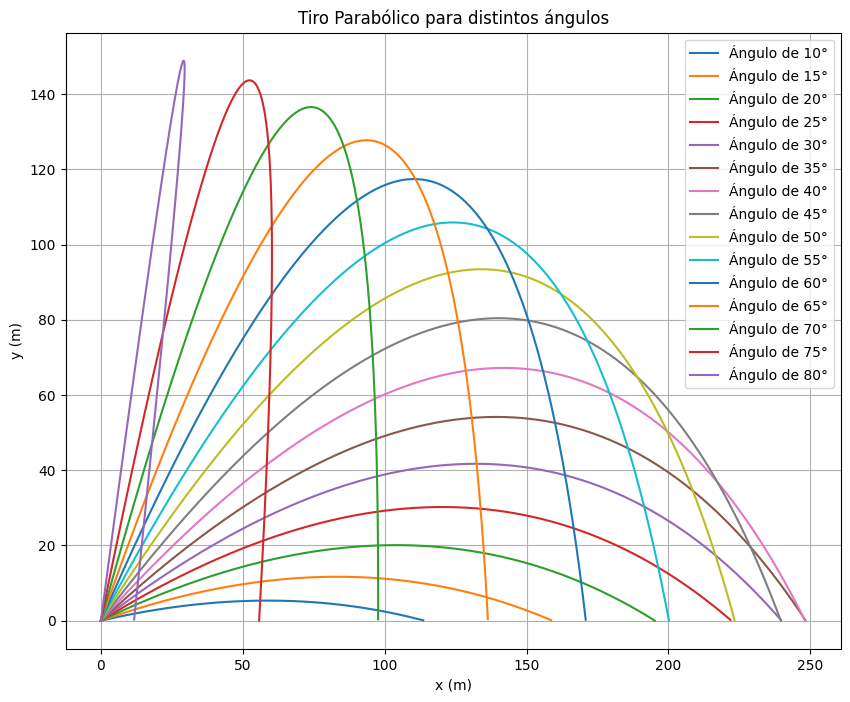

In [15]:
# Crea una figura con un tamaño específico
plt.figure(figsize=(10, 8))

# Itera a través de ángulos de lanzamiento de 10 a 80 grados con incrementos de 5 grados
for i in range(10, 81, 5):
  # Llama a la función tiro_parabolico con el ángulo actual para graficar la trayectoria
  tiro_parabolico(i)

# Agrega una leyenda para identificar las trayectorias correspondientes a diferentes ángulos
plt.legend()

# 4.

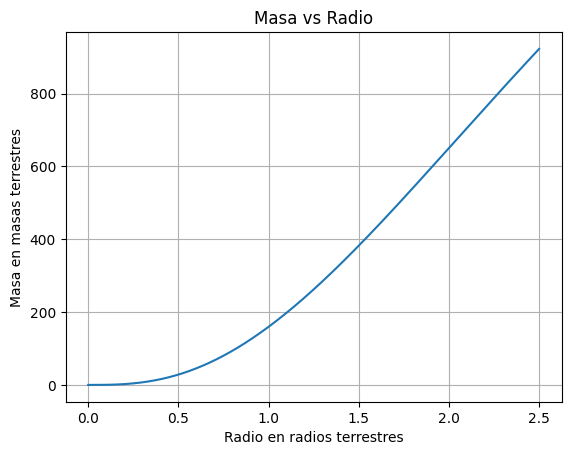

In [16]:
p_0 = 18000
L = 6500*10e3
M = lambda R: 4*np.pi*p_0*(2*L**3 - L*np.exp(-R/L)*(2*L**2 + 2*L*R + R**2))

M_t = 5.9722 * 10e24
M_g832c = 5.4*M_t

R_t = 6371*10e3

R_ = np.linspace(0, 2.5*R_t, 1000)

plt.plot(R_/R_t, M(R_)/M_t)
plt.xlabel("Radio en radios terrestres")
plt.ylabel("Masa en masas terrestres")
plt.title("Masa vs Radio")
plt.grid(True)

In [17]:
Mm = lambda R: 4*np.pi*p_0*(2*L**3 - L*np.exp(-R/L)*(2*L**2 + 2*L*R + R**2)) - M_g832c

a = 0
b = 0.5 * R_t

raiz = bisect(Mm, a, b)

print("La raíz encontrada en radios terrestres es: ", raiz/R_t)

La raíz encontrada en radios terrestres es:  0.2722432132369981


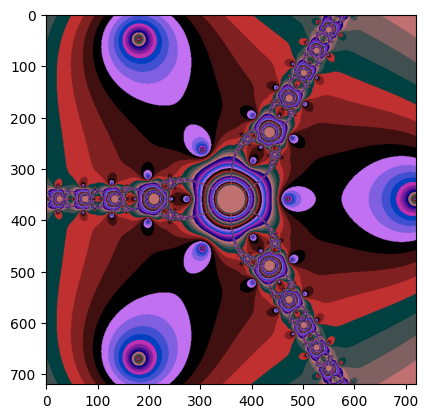

In [18]:
from PIL import Image

# Dimensiones de la imagen
Npx_X = 720
Npx_Y = 720

# Creación de la imagen en blanco
image = Image.new("RGB", (Npx_X, Npx_Y))

# Coordenadas en el plano complejo
xmin = -1
xmax = 1
ymin = -1
ymax = 1

# Mapeo de píxeles a coordenadas complejas
npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)
zx = npx * (xmax - xmin) / (Npx_X - 1) + xmin
zy = npy * (ymax - ymin) / (Npx_Y - 1) + ymin

# Función y derivada
def f(z):
    return z**3 - 1

def fp(z):
    return 3 * z**2

# Parámetros
a = 0.2
Niteraciones = 120
eps = 10e-10

# Generación de la imagen
x = -1
for zx_ in zx:
    x = x + 1
    y = -1
    for zy_ in zy:
        y = y + 1
        Z_0 = complex(zx_, zy_)

        for i in range(0, Niteraciones):
            Z = Z_0 - a * f(Z_0) / fp(Z_0)
            if abs(Z - Z_0) <= eps:
                break

            Z_0 = Z

        r, g, b = i % 4 * 64, i % 8 * 16, i % 16 * 16
        image.putpixel((x, y), (r, g, b))

# Mostrar la imagen resultante
plt.imshow(image)
plt.show()